<a href="https://colab.research.google.com/github/tayrone/tidy_tuesday_python/blob/main/fishing_210608.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("whitegrid")
#plt.rcParams['figure.figsize'] = [14, 4]

%load_ext google.colab.data_table
from google.colab import data_table as dt


In [2]:
fishing = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/'\
                      'tidytuesday/master/data/2021/2021-06-08/fishing.csv')

fishing = fishing[fishing.year > 1925]

## Exploratory Data Analysis

In [3]:
fishing_sum = (fishing
               .groupby(['year', 'lake'])[['values']]
               .sum())

No handles with labels found to put in legend.


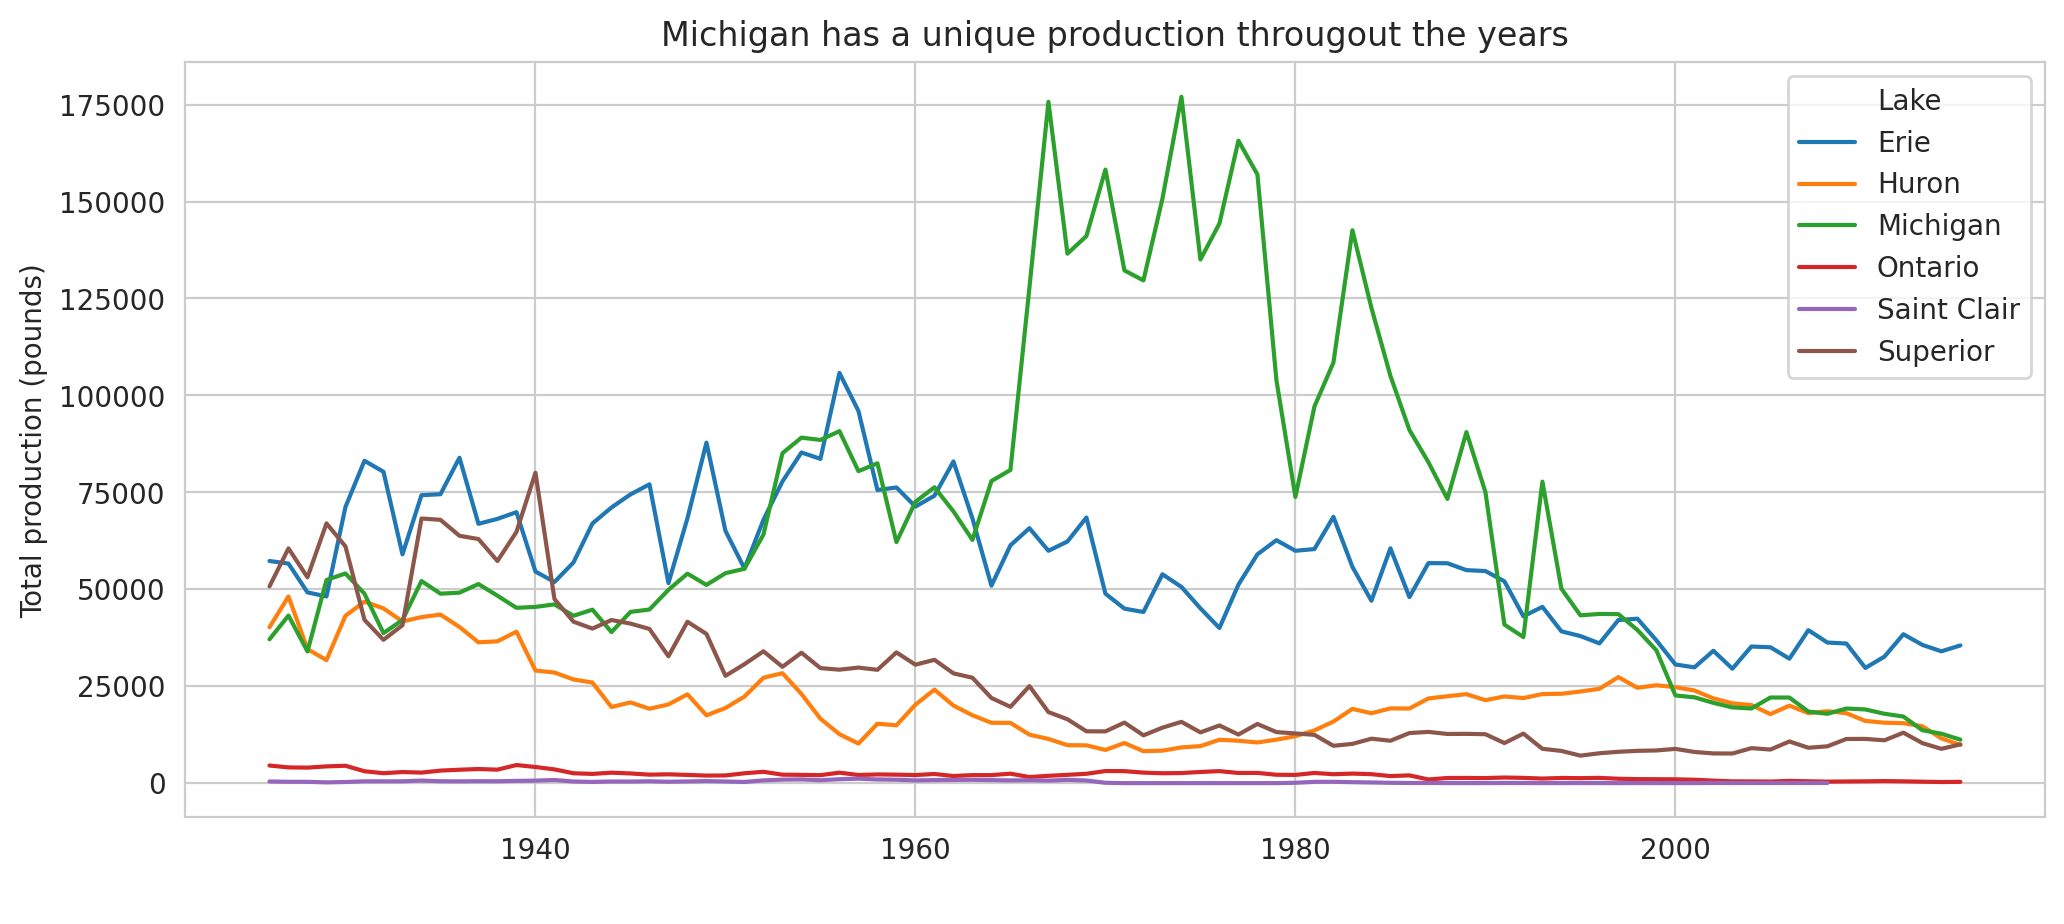

In [4]:
plt.figure(figsize = (12, 5), dpi = 200)
sns.set_style("whitegrid")

plt.ticklabel_format(style = 'sci', axis = 'y')
plt.title('Michigan has a unique production througout the years')
plt.ylabel('Total production (pounds)')
plt.xlabel(' ')
plt.legend(title = 'Lake')

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = sns.lineplot(x = 'year', y = 'values', data = fishing_sum, hue = 'lake',)

ax.legend(title = 'Lake')
plt.show(ax)


It is not feasible to analyze the behaviour of each species on each lake:

In [5]:
len(fishing
    .groupby(['year', 'lake', 'species'])
    .sum())

8682

In [6]:
grand_total = fishing.groupby(['species', 'year']).first()

grand_total = grand_total.reset_index()[['species', 'year', 'grand_total']]

grand_total = grand_total.dropna()



In [7]:
species_max = (grand_total
              .groupby(['species'])['grand_total']
              .max()
              .to_frame())

species_max.columns = ['species_max']



In [8]:
grand_total = grand_total.merge(species_max, on = 'species')

grand_total = grand_total[grand_total.species_max > 10000]

grand_total = grand_total.reset_index()[['year', 'species', 'grand_total']]


In [9]:
year_total = (grand_total
             .groupby(['year'])[['grand_total']]
             .sum())

year_total[['species']] = "Total"

year_total = year_total.reset_index()[['year', 'species', 'grand_total']]


In [14]:
grand_total = grand_total.append(year_total, ignore_index = True)